## Content
* [Project Description]
* [Import Library]
* [Checking Datasets]
    * [Contract]
    * [Internet]
    * [Personal]
    * [Phone]
* [Clarifying Questions]
* [Steps]
* [Pre-processing Datasets]
    * [Cleaning Datasets]
    * [Merging Datasets]
* [EDA]
    * [Class Imbalanced]
    * [Perbandingan data kategori dengan jumlah klien]
    * [Perbandingan klien berdasarkan data numerik]
    * [Layanan Telpon vs Layanan Internet]
* [Kesimpulan Umum]
* [Model Training]
    * [For Non-LGBM Model]
        * [Label Encode]
        * [Split Dataset]
        * [Apply Upsampling Function]
        * [Feature Scalling]
    * [Preparing Feature for LGBM]
        * [Split Dataset]
        * [Apply Upsampling Function]
        * [Feature Scalling]
    * [Logistic Regression]
    * [Random Forest Classifier]
    * [LGBM Classifier]
* [Final Test]
    * [ROC Curve]
* [Conclusion]
* [Solution Report]

## Project Description

Operator telekomunikasi bernama Interconnect ingin meramalkan tingkat _churn_ klien mereka. Jika diketahui bahwa seorang klien berencana untuk berhenti, klien tersebut akan ditawari kode promosi dan opsi paket khusus. Tim pemasaran Interconnect telah mengumpulkan beberapa data pribadi klien, termasuk informasi tentang paket data yang dipilih dan kontrak mereka.

## Import Library

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

In [2]:
try:
    contract_df = pd.read_csv('D:/datasets/final_provider/contract.csv')
    internet_df = pd.read_csv('D:/datasets/final_provider/internet.csv')
    personal_df = pd.read_csv('D:/datasets/final_provider/personal.csv')
    phone_df = pd.read_csv('D:/datasets/final_provider/phone.csv')
except:
    contract_df = pd.read_csv('/datasets/final_provider/contract.csv')
    internet_df = pd.read_csv('/datasets/final_provider/internet.csv')
    personal_df = pd.read_csv('/datasets/final_provider/personal.csv')
    phone_df = pd.read_csv('/datasets/final_provider/phone.csv')

## Checking Datasets

### Contract

In [3]:
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


Pada tabel contract ada beberapa kolom yang perlu diperbaiki untuk tipe datanya. tabel-tabel tersebut diantaranya adalah `BeginDate`, `EndDate`, and `TotalCharges`.

### Internet

In [5]:
internet_df.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [6]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


Tidak ada yang perlu diubah pada tabel ini. Semua sudah memiliki tipe data yang sesuai.

### Personal

In [7]:
personal_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
personal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


Tidak ada yang perlu diubah pada tabel ini.

### Phone

In [9]:
phone_df.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [10]:
phone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


Tidak ada yang perlu diubah pada tabel ini.

## Clarifying Questions

1. Jenis klien apa yang paling banyak? Apakah yang masih berlangganan atau yang sudah berhenti?
2. Bagiaman perbandingan klien yang bertahan dan tidak dengan fitur kategori pada layanan internet dan phone? Apakah semua fitur memberikan impact pada target?
3. Bagaimana perbandingan klien yang bertahan dan tidak terhadap fitur numerik? Adakah fitur yang kurang berimpact?
4. Berapa lama waktu yang dihabiskan oleh klien yang berlangganan dan yang sudah berhenti?
5. Layanan apa yang palin disukai oleh para klien?

## Steps

**1. Pre-processing Datasest**

Pada tahap ini data akan diproes dulu sebelum ke tahap EDA seperti merubah tipe dataset yang salah dan mebersihkan dataset dari nilai yang hilang dan juga menambahkan kolom sebagai target yaitu kolom yang berisi status klien. Setelah itu akan dilakukan penggabungan dataset sesuai dengan key-nya yaitu `customerID`. 

**2. EDA**

Pada tahap ini akan dilakukan data eskplorasi untuk mencari fitur mana yang diperlukan nanti pada tahap train model.

**3. Model Training**

Setelah semua fitur sudah ditentukan dan diubah menggunakan fetature engineering data akan ditraining. Model yang digunakan adalah Logistic Regression, Random Forest Classifier, dan yang terakhir menggunakan algoritma optimasi yaitu LGBM Classifier. Data akan dibagi menjadi train set dan test set setelah itu akan dilakukan hyperparamaeter tuning.

**4. Kesimpulan**

Pada bagian ini, akan diputuskan model mana yang terbaik berdasarkan hasil yang dikeluarkan.

## Pre-processing Datasets

Sebelum kita melakukan EDA dan pelatihan model, terlebih dahulu saya melakukan pre-processing data agar tidak terjadi kesalahan dalam menganalisa data dan pengembahan suatu model.

### Cleaning Datasets

In [11]:
'''
Data tanggal yang memiliki tipe data yang tidak sesuai diubah menjadi tipe data datetime. Karena pada kolom EndDate memiliki
nilai No, maka akan diubah dulu menjadi tanggal 2020-02-01 yang berarti para klien masih aktif berlangganan sampai waktu
tersebut.
'''
contract_df['BeginDate'] = pd.to_datetime(contract_df['BeginDate'], format='%Y-%m-%d')
contract_df['EndDate'] = contract_df['EndDate'].replace('No', '2020-02-01 00:00:00')
contract_df['EndDate'] = pd.to_datetime(contract_df['EndDate'], format='%Y-%m-%d %H:%M:%S')

In [12]:
# merubah tipe data pada kolom TotalCharges
contract_df['TotalCharges'] = pd.to_numeric(contract_df['TotalCharges'], errors='coerce')

Selanjutnya adalah kita akan menambahkan kolom yang menandakan status dari klien. Isi dari kolom ini adalah bilangan biner 0 dan 1. Di mana 0 artinya tidak berhenti langganan dan 1 artinya berhenti berlangganan.

In [13]:
# menambahkan kolom statusclient sebagai target nanti untuk model
contract_df['Exited'] = contract_df['EndDate'].apply(lambda x: 0 if x == pd.to_datetime('2020-02-01') else 1)

In [14]:
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1


Untuk mengetahui berapa lama klien menggunakan layanan, maka akan ditambahkan satu kolom lagi yang berisikan jumlah hari klien menggunakan layanan. Caranya adalah dengan mengurangkan kolom `EndDate` dan kolom `BeginDate`.

In [15]:
# menambahkan kolom hari
contract_df['Days'] = (contract_df['EndDate'] - contract_df['BeginDate']).dt.days 

In [16]:
contract_df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,Days
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61


Karena kolom `BeginDate` dan `EndDate` tidak diperlukan lagi, maka kolomnya akan dihapus untuk mempermudah EDA. Dan juga kita akan menghapus nilai yang hilang pada kolom `TotalCharges`.

In [17]:
# menghapus kolom
contract_df.drop(['BeginDate', 'EndDate'], axis=1, inplace=True)

In [18]:
# menghilangkan nilai NaN
contract_df.dropna(inplace=True)
contract_df.reset_index(drop=True, inplace=True)
contract_df

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,Days
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61
...,...,...,...,...,...,...,...,...
7027,6840-RESVB,One year,Yes,Mailed check,84.80,1990.50,0,730
7028,2234-XADUH,One year,Yes,Credit card (automatic),103.20,7362.90,0,2191
7029,4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,346.45,0,337
7030,8361-LTMKD,Month-to-month,Yes,Mailed check,74.40,306.60,1,123


Karena tabel yang memiliki masalah adalah tabel contract, maka untuk tabel lain tidak mengalami perubahan. Selanjutnya akan digabungkan tabel-tabel tersebut menjadi satu dataframe.

### Merging Datasets

In [19]:
# first merge
merge1 = pd.merge(contract_df, personal_df, on='customerID', how='left')

In [20]:
merge1.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,Days,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,0,Yes,No
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036,Male,0,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,0,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,Male,0,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Female,0,No,No


In [21]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   Exited            7032 non-null   int64  
 7   Days              7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 714.2+ KB


In [22]:
# second merge
merge2 = pd.merge(merge1, internet_df, on='customerID', how='left')

In [23]:
merge2.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,Days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No


In [24]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   Exited            7032 non-null   int64  
 7   Days              7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


In [25]:
# final merge
data_final = pd.merge(merge2, phone_df, on='customerID', how='left')

In [26]:
data_final.head()

,customerID,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,Days,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,One year,No,Mailed check,56.95,1889.50,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [27]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   Exited            7032 non-null   int64  
 7   Days              7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


In [28]:
data_final.isna().sum()

customerID             0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Exited                 0
Days                   0
gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1520
OnlineSecurity      1520
OnlineBackup        1520
DeviceProtection    1520
TechSupport         1520
StreamingTV         1520
StreamingMovies     1520
MultipleLines        680
dtype: int64

Pada tabel `data_final` terdapat begitu banyak nilai yang hilang jadi sangat mustahil untuk menghapus itu semua. Jadi, nilai yang hilang akan diisi dengan nilai yang sesuai.

Data yang hilang tidak terisi karena beberapa klien tidak memilih akses yang sama. Jadi, untuk nilai yang sama bisa kita isi dengan nilai No.

In [29]:
# mengisi nilai yang hilang dengan nilai yang hilang
str_col = data_final.columns[data_final.dtypes == 'object']
data_final[str_col] = data_final[str_col].fillna("No")

In [30]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Type              7032 non-null   object 
 2   PaperlessBilling  7032 non-null   object 
 3   PaymentMethod     7032 non-null   object 
 4   MonthlyCharges    7032 non-null   float64
 5   TotalCharges      7032 non-null   float64
 6   Exited            7032 non-null   int64  
 7   Days              7032 non-null   int64  
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


## EDA

### Class Imbalanced

Pada data terdapat kolom yang isinya status dari klien. Data akan dicek dulu tentang keseimbangan class yang ada.

<AxesSubplot:ylabel='Frequency'>

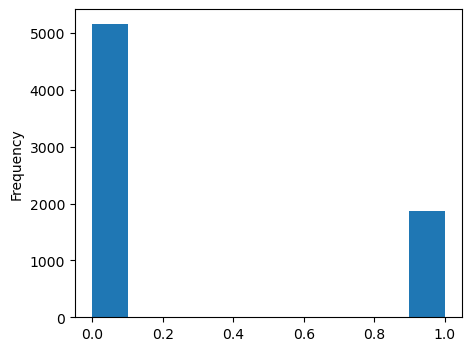

In [31]:
# tabel histogram
data_final['Exited'].plot(kind='hist', figsize=(5,4))

Pada tabel tersebut ditunjukkan bahwa klien yang belum berehenti layanan lebih banyak sekitar lebih dari 5000 dan orang yang sudah berhenti berlayanan itu kurang dari 2000. Jelas terdapat imbalanced class di sini yang akan mempengaruhi kerja model nantinya.

### Perbandingan data kategori dengan jumlah klien

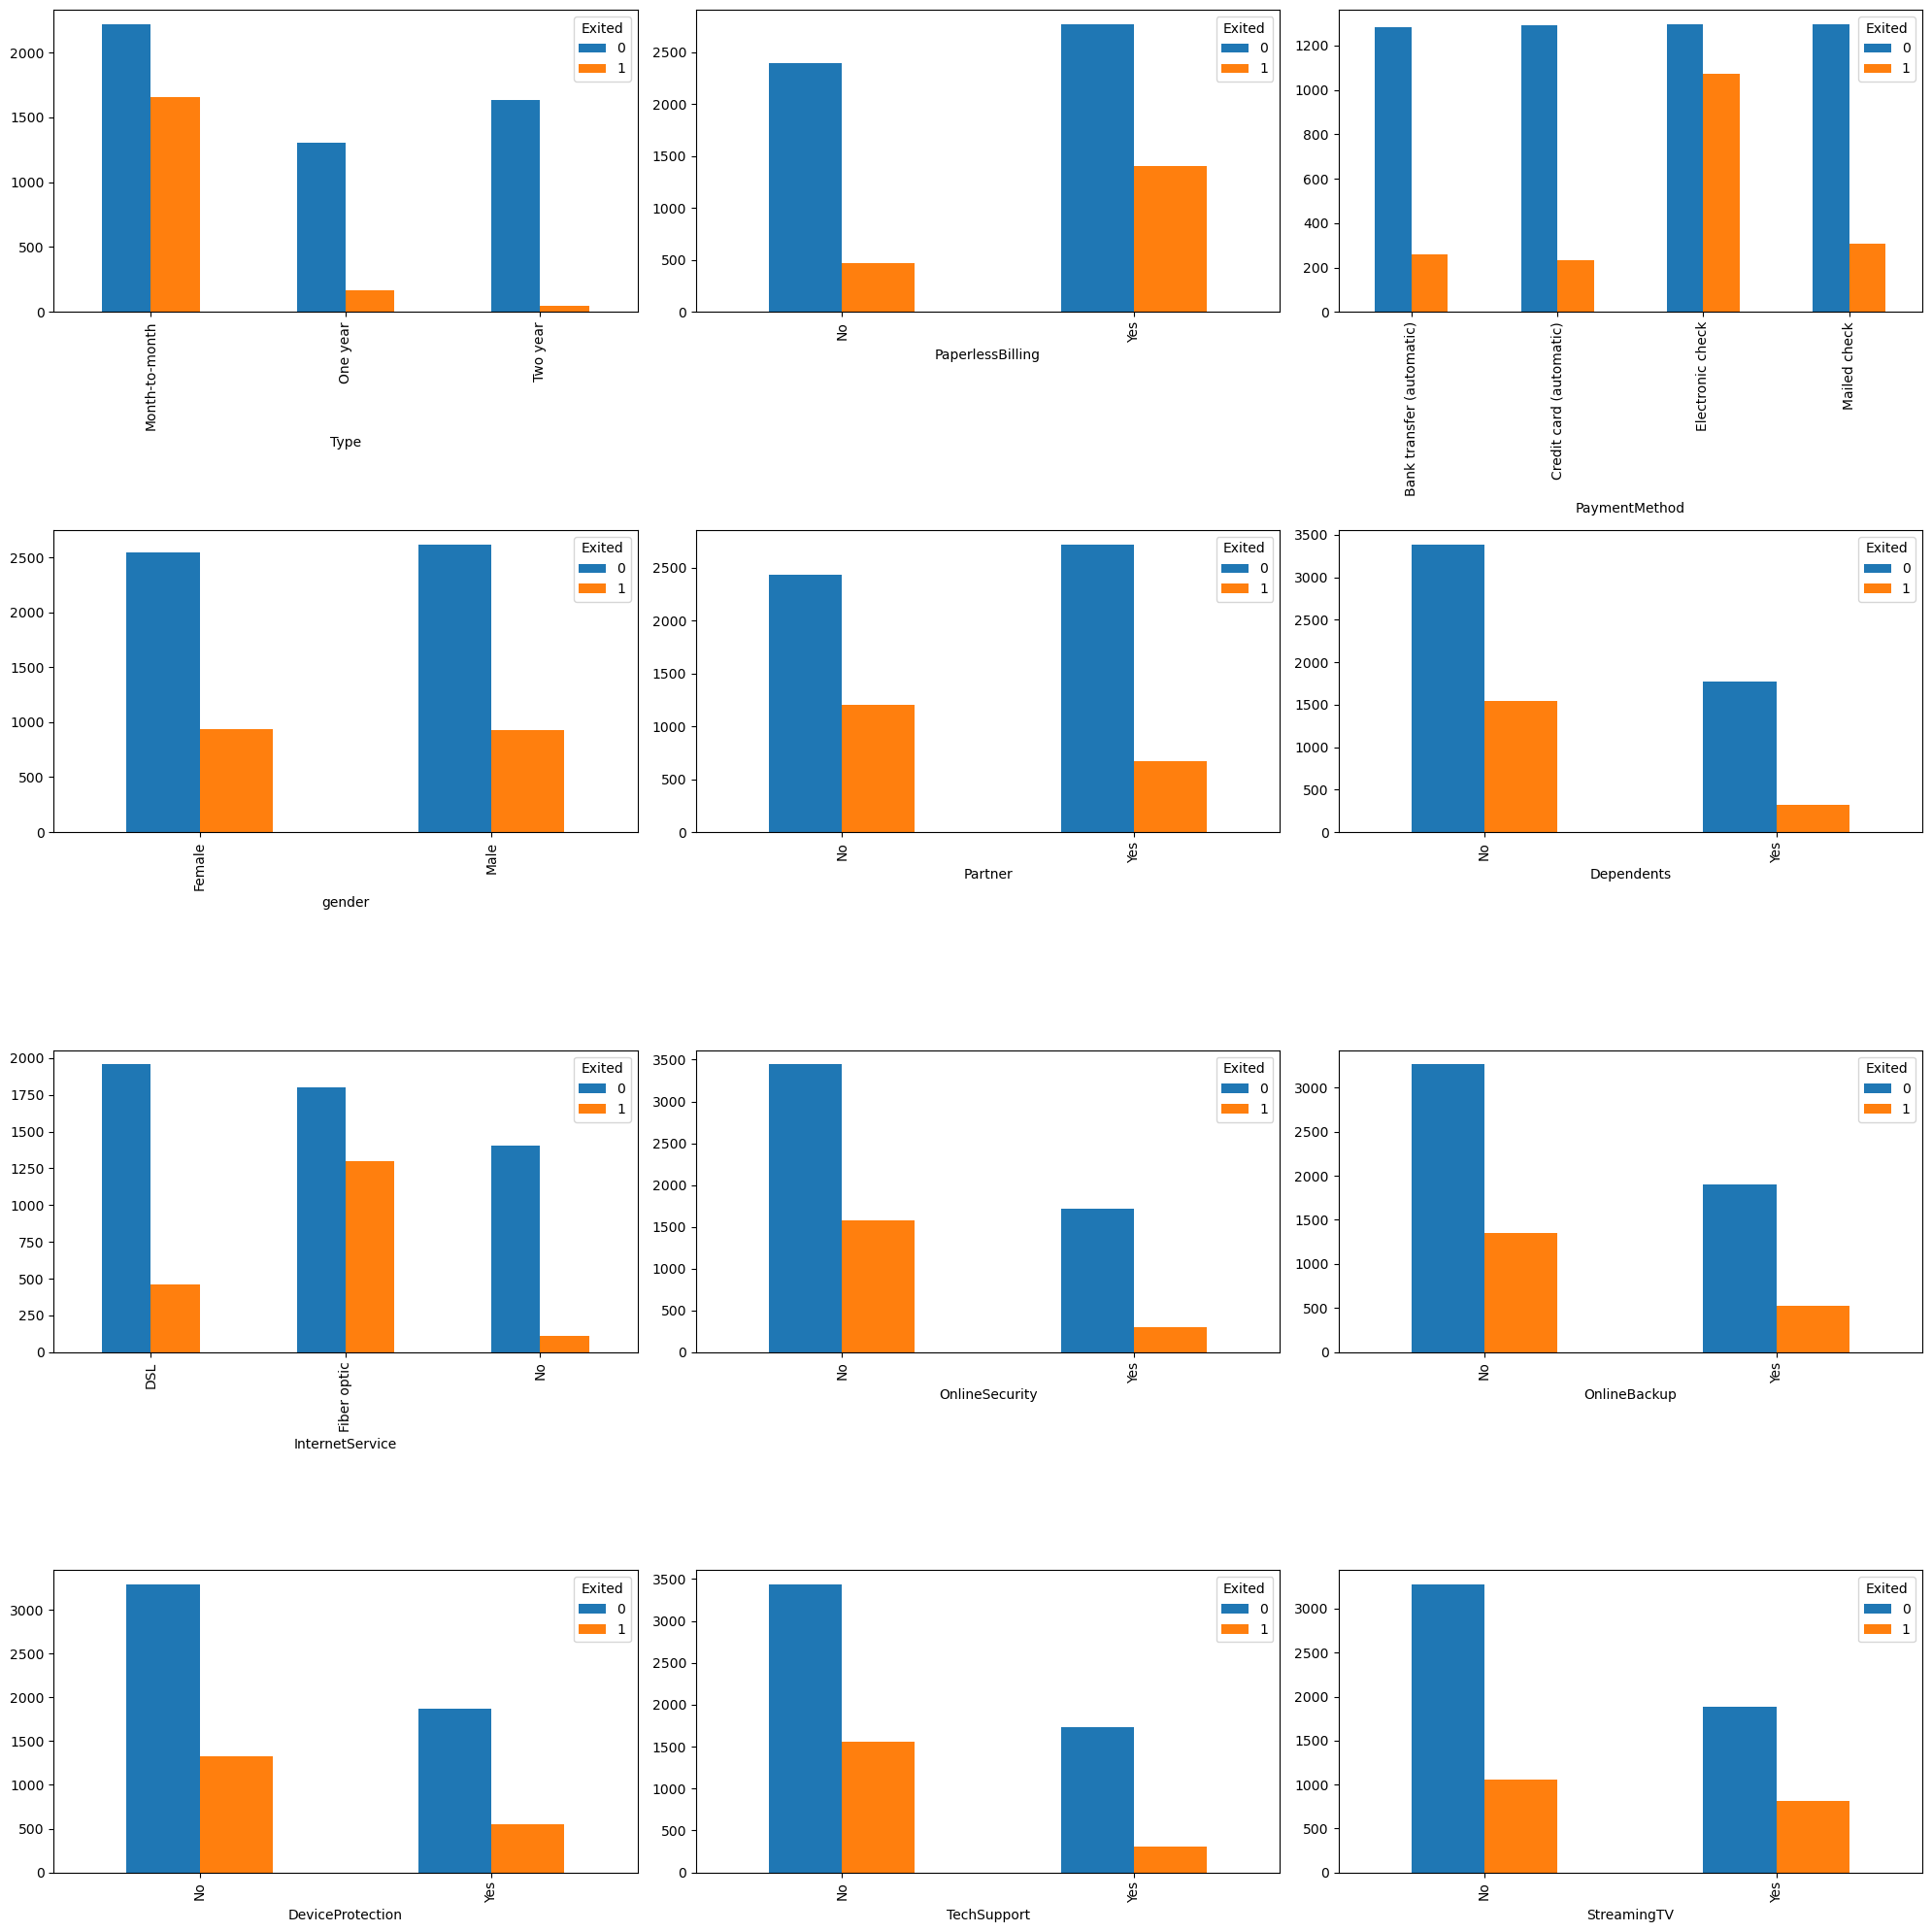

In [32]:
# membuat bar chart klien terhadap data kategori
col = list(data_final.columns[data_final.dtypes == 'object'])
col.remove('customerID')
fig, ax = plt.subplots(4, len(col)//4, figsize=(20,20))
ax = ax.flatten()
for c, a in zip(col, ax):
    data = data_final.groupby([c, 'Exited'])['Exited'].count().unstack()
    data.plot(kind='bar', ax=a,)
plt.tight_layout()
plt.show() 

**Untuk klien yang masih berlangganan:**
- Klien lebih suka melakukan langganan secara bulanan dan melakukan paperless billing.
- Untuk internet service lebih banyak menggunakan DSL.
- Kebanyak tidak menggunakan layanan internet dan layanan telpon.
- Pada bagian gender lebih banyak laki-laki daripada perempuan.

**Untuk klien yang berhenti:**
- Sama seperti klien masih berlangganan, mereka lebih suka melakukan pembayaran secara per-bulan, melakukan paperless billing, dan metode pembayaran menggunakan electronic check.
- Untuk layanan internet lebih banyak menggunakan field optic dan untuk layanan lain tidak banyak yang menggunakan.
- Untuk layanan telpon tidak banyak klien yang menggunakan.
- Pada bagian gender lebih banyak perempuan sedikit daripada laki-laki.

### Perbandingan klien berdasarkan data numerik

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


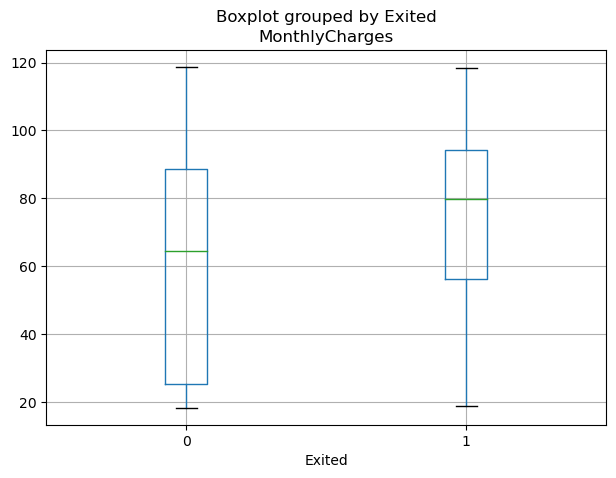

In [33]:
# boxplot Monthly charges
data_final.boxplot(column='MonthlyCharges', by='Exited', figsize=(7,5))
print(data_final['MonthlyCharges'].describe())

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


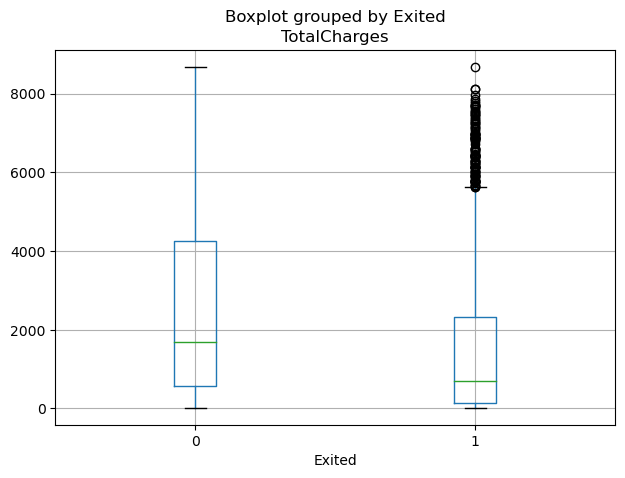

In [34]:
# boxplot Total charges
data_final.boxplot(column='TotalCharges', by='Exited', figsize=(7,5))
print(data_final['TotalCharges'].describe())

count    7032.000000
mean      987.538538
std       747.153663
min        30.000000
25%       275.000000
50%       883.000000
75%      1676.000000
max      2191.000000
Name: Days, dtype: float64


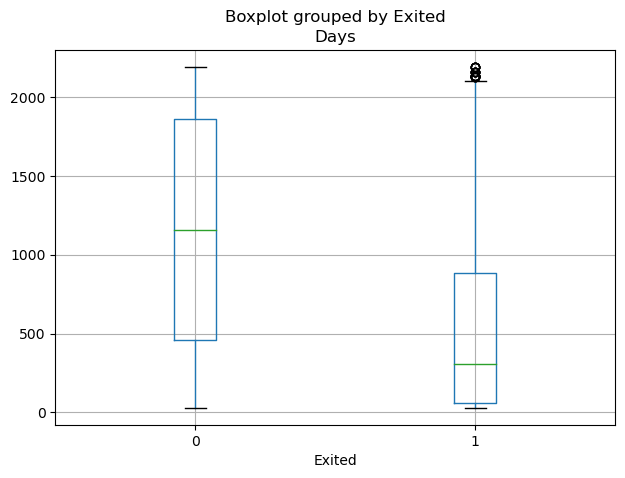

In [35]:
# boxplot Days
data_final.boxplot(column='Days', by='Exited', figsize=(7,5))
print(data_final['Days'].describe())

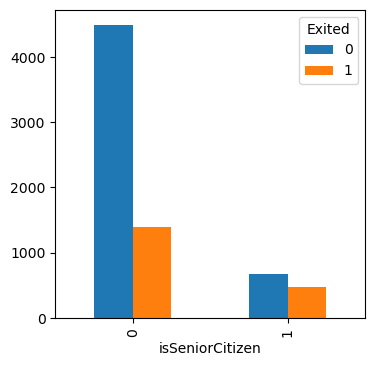

In [36]:
# barchart Senior citizen
citizen = data_final.groupby(['SeniorCitizen', 'Exited'])['Exited'].count().unstack()
citizen.plot(kind='bar', figsize=(4,4))
plt.xlabel('isSeniorCitizen')
plt.show()

**Untuk klien yang masih berlangganan:**
- Pada kolom `MonthlyCharges`, banyak klien yang melakukan pembayaran perbulan. Namun, mereka jumlah pembayarannya tidak banyak dengan rata-ratanya adalah sekitar 60-an.
- Pada kolom `TotalCharges`, karena banyak klien yang belum berhenti berlangganan, maka banyak datanya lebih condong ke kanan. Dengan rata-rata pembayarannya lebih tinggi disebabkan oleh lamanya klien berlangganan.
- Pada kolom `Days`, klien yang belum pergi lebih lama berlangganan dengan rata-rata adalah 1000 hari.
- Pada kolom `SeniorCitizen`, banyak klien yang merupakan senior citizen.

**Untuk klien yang berhenti:**
- Pada kolom `MonthlyCharges`, klien lebih banyak melakukan pembayaran dengan jumlah yang besar dari pada klien yang masih berlangganan.
- Pada kolom `TotalCharges`, karena klien tidak bertahan selama yang berlangganan maka total charges nya lebih sedikit.
- Pada kolom `Days`, rata-rata klien berlanggana di bawah 500 hari.
- Pada kolom `SeniorCitize`, tidak ada yang merupakan senior citizen untuk klien yang berhenti.

In [37]:
# cek korelasi
data_final.corr()

,MonthlyCharges,TotalCharges,Exited,Days,SeniorCitizen
MonthlyCharges,1.000000,0.651065,0.192858,0.246715,0.219874
TotalCharges,0.651065,1.000000,-0.199484,0.825811,0.102411
Exited,0.192858,-0.199484,1.000000,-0.354496,0.150541
Days,0.246715,0.825811,-0.354496,1.000000,0.015630
SeniorCitizen,0.219874,0.102411,0.150541,0.015630,1.000000


Antar kolom tidak memiliki korelasi yang begitu kuat, hanya antara kolom `Days` dan juga kolom `TotalCharges` yang memiliki korelasi tinggi. Ini bisa terjadi karena semakin lama orang berlangganan, maka total biayanya semakin tinggi.

### Layanan Telpon vs Layanan Internet

Karena di perusahaan memiliki dua layanan, yaitu layanan telpon dan layanan internet. Maka, akan dilihat distribusi dari setiap layanan tersebut

In [38]:
# internet service
internet_serv = data_final[data_final['customerID'].isin(internet_df['customerID'])]

In [39]:
internet_serv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5512 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5512 non-null   object 
 1   Type              5512 non-null   object 
 2   PaperlessBilling  5512 non-null   object 
 3   PaymentMethod     5512 non-null   object 
 4   MonthlyCharges    5512 non-null   float64
 5   TotalCharges      5512 non-null   float64
 6   Exited            5512 non-null   int64  
 7   Days              5512 non-null   int64  
 8   gender            5512 non-null   object 
 9   SeniorCitizen     5512 non-null   int64  
 10  Partner           5512 non-null   object 
 11  Dependents        5512 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


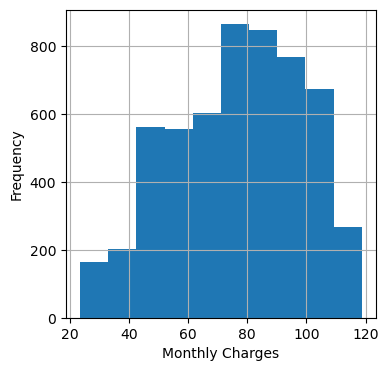

In [40]:
# histogram kolom monthly charges
internet_serv['MonthlyCharges'].hist(bins=10, figsize=(4,4))
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

count    3756.000000
mean       76.356709
std        22.272199
min        24.150000
25%        59.137500
50%        78.725000
75%        94.312500
max       118.750000
Name: MonthlyCharges, dtype: float64

count    1756.000000
mean       77.920985
std        21.144147
min        23.450000
25%        69.350000
50%        80.450000
75%        94.650000
max       118.350000
Name: MonthlyCharges, dtype: float64


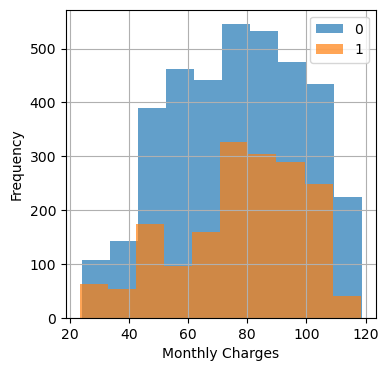

In [41]:
# describe data per status klien
print(internet_serv[internet_serv['Exited']==0]['MonthlyCharges'].describe())
print()
print(internet_serv[internet_serv['Exited']==1]['MonthlyCharges'].describe())

# grafik histogram per status klien
internet_serv[internet_serv['Exited']==0]['MonthlyCharges'].hist(bins=10, figsize=(4,4), alpha=0.7, label=0)
internet_serv[internet_serv['Exited']==1]['MonthlyCharges'].hist(bins=10, figsize=(4,4), alpha=0.7, label=1)
plt.legend(loc="upper right")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

**Kesimpulan kolom MonthylCharges:**
- Secara umum, banyak klien yang membayar di sekitar angka 80-an.
- Ketika dibedakan antara klien yang tetap dan klien yang pergi, mereka sama-sama memiliki distribusi yang hampir sama.
- Memiliki rata-rata angka yang sama serta nilai minimal dan maximal charge yang sama.

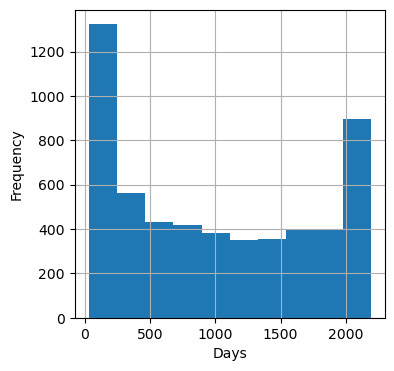

In [42]:
# histogram kolom days
internet_serv['Days'].hist(bins=10, figsize=(4,4))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

count    3756.000000
mean     1205.955804
std       723.904224
min        31.000000
25%       549.000000
50%      1248.000000
75%      1888.000000
max      2191.000000
Name: Days, dtype: float64

count    1756.000000
mean      566.432802
std       598.823271
min        30.000000
25%        83.500000
50%       306.000000
75%       914.000000
max      2191.000000
Name: Days, dtype: float64


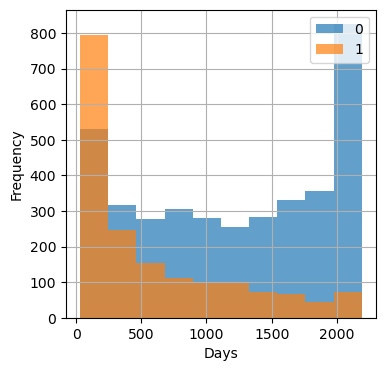

In [43]:
# describe data per status klien
print(internet_serv[internet_serv['Exited']==0]['Days'].describe())
print()
print(internet_serv[internet_serv['Exited']==1]['Days'].describe())

# grafik per status klien
internet_serv[internet_serv['Exited']==0]['Days'].hist(bins=10, figsize=(4,4), alpha=0.7, label=0)
internet_serv[internet_serv['Exited']==1]['Days'].hist(bins=10, figsize=(4,4), alpha=0.7, label=1)
plt.legend(loc="upper right")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()
plt.show()

**Kesimpulan kolom Days:**
- Total hari klien berlangganan paling banyak kurang dari 500 hari.
- Rata-rata hari yang dihabiskan untuk klien yang berhenti adalah sekitar 566 hari.
- Klien yang berhenti kebanyakan menghabiskan hari sekitar 83.
- Klien yang berhenti, kebanyakan adalah klien yang berlangganan secara bulanan.

In [44]:
# phone service
phone_serv = data_final[data_final['customerID'].isin(phone_df['customerID'])]

In [45]:
phone_serv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6352 entries, 1 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6352 non-null   object 
 1   Type              6352 non-null   object 
 2   PaperlessBilling  6352 non-null   object 
 3   PaymentMethod     6352 non-null   object 
 4   MonthlyCharges    6352 non-null   float64
 5   TotalCharges      6352 non-null   float64
 6   Exited            6352 non-null   int64  
 7   Days              6352 non-null   int64  
 8   gender            6352 non-null   object 
 9   SeniorCitizen     6352 non-null   int64  
 10  Partner           6352 non-null   object 
 11  Dependents        6352 non-null   object 
 12  InternetService   6352 non-null   object 
 13  OnlineSecurity    6352 non-null   object 
 14  OnlineBackup      6352 non-null   object 
 15  DeviceProtection  6352 non-null   object 
 16  TechSupport       6352 non-null   object 


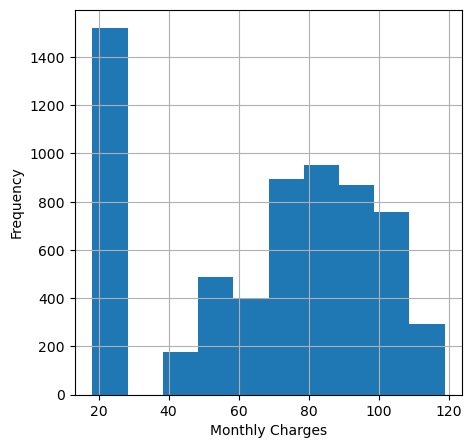

In [46]:
# kolom Monthlycharges
phone_serv['MonthlyCharges'].hist(bins=10, figsize=(5,5))
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

count    4653.000000
mean       63.261552
std        31.934310
min        18.250000
25%        24.500000
50%        69.900000
75%        90.050000
max       118.750000
Name: MonthlyCharges, dtype: float64

count    1699.000000
mean       78.134255
std        22.567643
min        18.850000
25%        69.975000
50%        80.950000
75%        94.850000
max       118.350000
Name: MonthlyCharges, dtype: float64


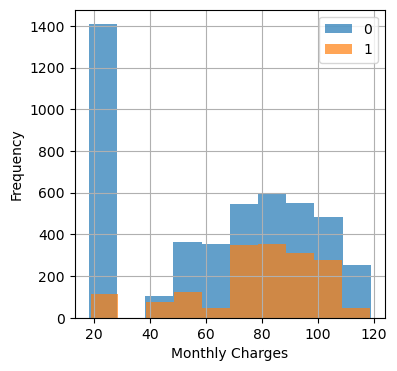

In [47]:
# describe data per status klien
print(phone_serv[phone_serv['Exited']==0]['MonthlyCharges'].describe())
print()
print(phone_serv[phone_serv['Exited']==1]['MonthlyCharges'].describe())

# grafik per status klien
phone_serv[phone_serv['Exited']==0]['MonthlyCharges'].hist(bins=10, figsize=(4,4), alpha=0.7, label=0)
phone_serv[phone_serv['Exited']==1]['MonthlyCharges'].hist(bins=10, figsize=(4,4), alpha=0.7, label=1)
plt.legend(loc="upper right")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()
plt.show()

**Untuk kolom MonthlyCharges:**
- Secara umum para klien memilih biaya perbulan paling sedikit yaitu sekitar 20-an.
- Setelah histogram dipisahkan antara klien yang pergi dan tetap, ditemukan bahwa klien yang pergi lebih banyak membayar di sekitar 80.
- Klien yang menetap membayar sekitar 24 sampai 90, sedangkan untuk klien yang pergi membayar sekitar 69 sampai 94.

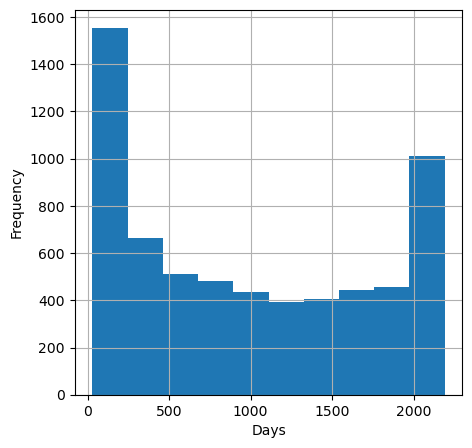

In [48]:
# kolom Days
phone_serv['Days'].hist(bins=10, figsize=(5,5))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

count    4653.000000
mean     1148.512573
std       734.785934
min        31.000000
25%       457.000000
50%      1157.000000
75%      1857.000000
max      2191.000000
Name: Days, dtype: float64

count    1699.000000
mean      553.880518
std       596.568794
min        30.000000
25%        61.000000
50%       304.000000
75%       883.000000
max      2191.000000
Name: Days, dtype: float64


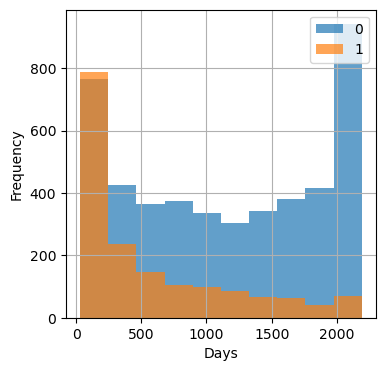

In [49]:
# describe data per status klien
print(phone_serv[phone_serv['Exited']==0]['Days'].describe())
print()
print(phone_serv[phone_serv['Exited']==1]['Days'].describe())

# grafik per status klien
phone_serv[phone_serv['Exited']==0]['Days'].hist(bins=10, figsize=(4,4), alpha=0.7, label=0)
phone_serv[phone_serv['Exited']==1]['Days'].hist(bins=10, figsize=(4,4), alpha=0.7, label=1)
plt.legend(loc="upper right")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()
plt.show()

**Untuk kolom Days:**
- Memiliki grafik yang hampir sama dengan layanan internet. Klien lebih banyak menghabiskan langganannya sekitar 200-an hari.
- Klien yang menetap dan klien yang pergi memiliki jumlah hari yang sama di hari 200-an.
- Klien yang menetap lebih banyak menghabiskan hari sekitar 2000-an. Hal ini dipicu karena jumlah klien yang sudah berlangganan lama.

## Kesimpulan Umum

Setelah melakukan EDA, jawaban yanng diajukan terjawab:
1. Klien yang paling banyak adalah klien yang masih berlangganan, dan diantara mereka ada lah klien yang memiliki masa berlangganan paling lama. Namun, saking banyaknya klien tersebut membuat kelas menjadi tidak seimbang.
2. Perbandingan klien terhadap fitur kategori memberi tahukan bahwa klien yang sudah berhenti memiliki jumlah langganan yang lebih sedikit dibandingkan yang masih berlangganan.
3. Berdasarkan perbadingan pada data numerik: 
    - Klien yang sudah berhenti memiliki rata-rata pembayaran yang lebih tinggi.
    - Klien yang berhenti bukan merupakan senior citizen. Kebanyakan dari mereka adalah orang baru atau orang yang masih muda.
4. Klienyang sudah berhenti cenderung tidak berlangganan cukup lama.
5. Ketika membandingkan antara layanan telpon dan layanan internet, ini yang saya temukan:
    - Untuk layanan internet, para klien lebih banyak membayar di sekitar 80-an. Kedua klien memiliki habit yang sama dalam jumlah tagihan yang perlu dibayarkan. Klien yang sudah berhenti suka dengan layanan internet. Dilihat dari histogram hari yang menunjukkan bahwa jumlah pengguna saat itu melebihi klien yang masih berlangganan.
    - Untuk layanan phone, para klien lebih banyak terkena biaya perbulan yaitu sekitar 20-an. Klien tersebut kebanyakan adalah klien yang masih berlangganan dan merupakan senior citizen. Untuk klien yang sudah berhenti, klien tersebut kurang suka dengan layanan phone yang disediakan. Tidak sebanyak layanan internet.
    
**Fitur-fitur yang akan dipakai dalam proses training**

Berdasarkan hasil analisis, fitur yang akan dipakai adalah:
- `Type`
- `PaperlessBilling`
- `PaymentMethod`
- `MonthlyCharges`
- `TotalCharges`
- `Days`
- `SeniorCitizen`
- `Partner`
- `Dependents`
- `InternetService`
- `OnlineSecurity`
- `OnlineBackup`
- `DeviceProtection`
- `TechSupport`
- `StreamingTV`
- `StreamingMovies`
- `MultipleLines`

**Target**
- `Exited`

## Model Training

Karena model akan dibuat, maka akan dihapus fitur-fitur yang tidak dibutuhkan oleh data set pada proses pengembangan model.

In [50]:
new_data = data_final.drop(['customerID', 'gender'], axis=1)

In [51]:
new_data.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Exited,Days,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,Month-to-month,Yes,Electronic check,29.85,29.85,0,31,0,Yes,No,DSL,No,Yes,No,No,No,No,No
1,One year,No,Mailed check,56.95,1889.50,0,1036,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,Month-to-month,Yes,Mailed check,53.85,108.15,1,61,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No
4,Month-to-month,Yes,Electronic check,70.70,151.65,1,61,0,No,No,Fiber optic,No,No,No,No,No,No,No


Karena datanya Imbalaced maka akan diubah menjadi balanced dengan menggunakan teknik *upsampling*.

In [52]:
# fungsi upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

### For Non-LGBM Model

#### Label Encode

In [53]:
encoder = OrdinalEncoder()
category = new_data.columns[new_data.dtypes=='object'] # mengambil kolom tipe data object
new_data[category] = encoder.fit_transform(new_data[category]) # encoding tipe data object

In [54]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   float64
 1   PaperlessBilling  7032 non-null   float64
 2   PaymentMethod     7032 non-null   float64
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   Exited            7032 non-null   int64  
 6   Days              7032 non-null   int64  
 7   SeniorCitizen     7032 non-null   int64  
 8   Partner           7032 non-null   float64
 9   Dependents        7032 non-null   float64
 10  InternetService   7032 non-null   float64
 11  OnlineSecurity    7032 non-null   float64
 12  OnlineBackup      7032 non-null   float64
 13  DeviceProtection  7032 non-null   float64
 14  TechSupport       7032 non-null   float64
 15  StreamingTV       7032 non-null   float64
 16  StreamingMovies   7032 non-null   float64


#### Split Dataset

In [55]:
features = new_data.drop(['Exited'], axis=1)
target = new_data['Exited']

# split dataset sebesar 75%
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25,\
                                                                            random_state=12345)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(5274, 17)
(1758, 17)
(5274,)
(1758,)


#### Apply Upsampling Function

In [56]:
target_train.value_counts() # class imbalanced

0    3870
1    1404
Name: Exited, dtype: int64

In [57]:
# upsampling
features_upsampled, target_upsampled = upsample(features_train, target_train, 5)
print(features_upsampled.shape)
print(target_upsampled.shape)

(10890, 17)
(10890,)


#### Feature Scalling

In [58]:
numeric = ['MonthlyCharges', 'TotalCharges', 'Days']
scaler = StandardScaler()
scaler.fit(features_upsampled[numeric])

features_upsampled[numeric] = scaler.transform(features_upsampled[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [59]:
features_upsampled.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Days,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
3475,0.0,0.0,2.0,-0.685950,-0.796508,-0.903470,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1056,0.0,1.0,2.0,0.749202,0.014304,-0.094754,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3778,0.0,1.0,2.0,1.137665,0.742775,0.417713,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
1804,0.0,1.0,2.0,0.547777,0.342094,0.292755,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5783,0.0,1.0,3.0,0.954224,-0.227934,-0.434527,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


### Preparing Feature for LGBM

In [60]:
'''
Karena LGBM bekerja langsung dengan fitur-fitur kategorik, maka akan diubah terlebih dahulu untuk
fitur yang memiliki tipe data objek
'''
no_encode = data_final.drop(['customerID', 'gender'], axis=1)
cat_features = no_encode.columns[no_encode.dtypes=='object'] # fitur dengan tipe data objek
no_encode[cat_features] = no_encode[cat_features].astype('category')
no_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Type              7032 non-null   category
 1   PaperlessBilling  7032 non-null   category
 2   PaymentMethod     7032 non-null   category
 3   MonthlyCharges    7032 non-null   float64 
 4   TotalCharges      7032 non-null   float64 
 5   Exited            7032 non-null   int64   
 6   Days              7032 non-null   int64   
 7   SeniorCitizen     7032 non-null   int64   
 8   Partner           7032 non-null   category
 9   Dependents        7032 non-null   category
 10  InternetService   7032 non-null   category
 11  OnlineSecurity    7032 non-null   category
 12  OnlineBackup      7032 non-null   category
 13  DeviceProtection  7032 non-null   category
 14  TechSupport       7032 non-null   category
 15  StreamingTV       7032 non-null   category
 16  StreamingMovies   7032 n

####  Split Dataset

In [61]:
# determine feature and target
features_no_en = no_encode.drop(['Exited'], axis=1)
target_no_en = no_encode['Exited']

#split dataset
ft_no_en_train, ft_no_en_test, t_no_en_train, t_no_en_test = train_test_split(features_no_en, target_no_en,\
                                                                             test_size=0.25, random_state=12345)
print(ft_no_en_train.shape)
print(ft_no_en_test.shape)
print(t_no_en_train.shape)
print(t_no_en_test.shape)

(5274, 17)
(1758, 17)
(5274,)
(1758,)


#### Apply Upsampling Function

In [62]:
t_no_en_train.value_counts()

0    3870
1    1404
Name: Exited, dtype: int64

In [63]:
# upsampling
ft_upsampled, t_upsampled = upsample(ft_no_en_train, t_no_en_train, 5)

In [64]:
print(ft_upsampled.shape)
print(t_upsampled.shape)

(10890, 17)
(10890,)


#### Feature Scalling

In [65]:
num_feat = ['MonthlyCharges', 'TotalCharges', 'Days']
scaler = StandardScaler()
scaler.fit(ft_upsampled[num_feat])
ft_upsampled[num_feat] = scaler.transform(ft_upsampled[num_feat])
ft_no_en_test[num_feat] = scaler.transform(ft_no_en_test[num_feat])

In [66]:
ft_upsampled.head()

,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Days,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
3475,Month-to-month,No,Electronic check,-0.685950,-0.796508,-0.903470,0,No,No,DSL,No,No,No,No,No,No,Yes
1056,Month-to-month,Yes,Electronic check,0.749202,0.014304,-0.094754,0,No,No,Fiber optic,No,No,No,Yes,Yes,No,Yes
3778,Month-to-month,Yes,Electronic check,1.137665,0.742775,0.417713,1,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
1804,Month-to-month,Yes,Electronic check,0.547777,0.342094,0.292755,1,Yes,No,Fiber optic,No,No,No,No,No,Yes,Yes
5783,Month-to-month,Yes,Mailed check,0.954224,-0.227934,-0.434527,1,No,No,Fiber optic,Yes,No,Yes,Yes,No,Yes,No


Karena data sudah disiapkan dari features dan juga targetnya, maka data akan langsung diuji coba dalam model. Sebelum memasukkan data ke dalam tahap pengujian, terlebih dahulu melakukan evaluasi. Teknik yang digunakan untuk menentukan model mana yang terbaik adalah menggunakan *cross validation* dan untuk *hyper parameter tuning* menggunakan *grid search cv*.

### Logistic Regression

In [67]:
# evaluasi model logistic regression
lr = LogisticRegression(solver='liblinear', random_state=12345)
lr_score = cross_val_score(lr, features_upsampled, target_upsampled, scoring='roc_auc',cv=5)
print("Hasil Cross Validation:",lr_score.mean())

Hasil Cross Validation: 0.8368718574467928


### Random Forest Classifier

In [68]:
# evaluasi model Random Forest Classifier
for depth in range(5, 15):
    rfc = RandomForestClassifier(n_estimators=50, max_depth=depth, random_state=12345)
    rfc_score = cross_val_score(rfc, features_upsampled, target_upsampled, scoring='roc_auc', cv=5)
    print("Max Depth:", depth, "Score:", rfc_score.mean())

Max Depth: 5 Score: 0.8631099221861497
Max Depth: 6 Score: 0.8735664804140256
Max Depth: 7 Score: 0.887395278900447
Max Depth: 8 Score: 0.9035690754360006
Max Depth: 9 Score: 0.9214690216951199
Max Depth: 10 Score: 0.9403567327016941
Max Depth: 11 Score: 0.9582914632979233
Max Depth: 12 Score: 0.9701162974741786
Max Depth: 13 Score: 0.9799481179649139
Max Depth: 14 Score: 0.9856304799134257


### LGBM Classifier

In [71]:
lgbm_c = LGBMClassifier()
params = {
    'num_leaves':[30, 50],
    'learning_rate':[0.5, 0.01],
    'n_estimators':[40, 100],
    'random_seed':[12345]
}

# mencari parameter terbaik untuk LGBM
grid_lgbm_c = GridSearchCV(estimator=lgbm_c, param_grid=params, scoring='roc_auc', cv=5)
grid_lgbm_c.fit(ft_upsampled, t_upsampled)
best_params = grid_lgbm_c.best_params_

In [72]:
print("Skor Terbaik:", grid_lgbm_c.best_score_)
print("Parameter:", best_params)

Skor Terbaik: 0.9888667115734299
Parameter: {'learning_rate': 0.5, 'n_estimators': 100, 'num_leaves': 50, 'random_seed': 12345}


## Final Test

Berdasarkan hasilnya, ternyata model yang paling baik adalah model LGBM Classifier dengan parameternya adalah learning rate: 0.5, n_estimators: 100, dan num_leaves: 50.

In [73]:
model = LGBMClassifier(learning_rate=0.5, n_estimators=100, num_leaves=50, random_seed=12345)
model.fit(ft_upsampled, t_upsampled)
predict = model.predict(ft_no_en_test)
accuracy = accuracy_score(t_no_en_test, predict)
proba = model.predict_proba(ft_no_en_test)
auc_roc = roc_auc_score(t_no_en_test, proba[:, 1])
print("AUC-ROC:", auc_roc)
print("Accuracy:", accuracy)

AUC-ROC: 0.9025072973579823
Accuracy: 0.8469852104664392


### ROC Curve

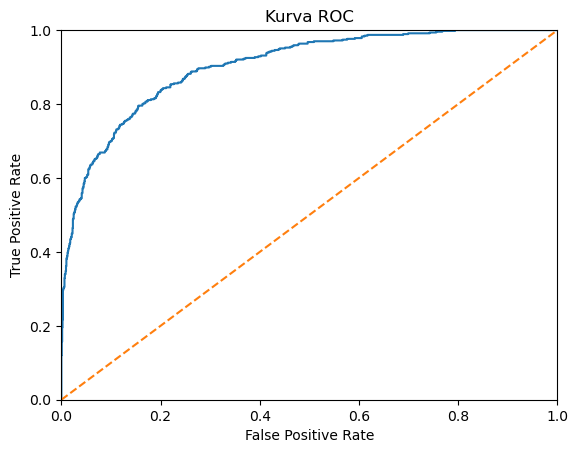

In [76]:
fpr, tpr, thresholds = roc_curve(t_no_en_test, proba[:, 1])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC')
plt.show()

Berdasarkan hasil dari AUC-ROC menggunakan LGBM Classifier Model, saya mendapatkan hasil **0.90** dan skor akurasi sebesar **0.84**. Hal ini menunjukkan bahwa model bisa sangat baik dalam membedakan hasil klien yang akan masih tinggal atau yang akan meninggalkan layanan.

## Conclusion

Berdasarkan Analisis Data Eskploratif:
- Orang yang sudah tidak berlangganan memiliki jumlah yang sedikit dibandingkan orang yang masih berlangganan.
- Orang yang sudah berhenti lebih suka bayar secara bulanan dan jenis pembayaran secara electronic.
- Orang yang sudah berhenti ternyata memiliki jumlah biaya perbulan yang lebih tinggi.
- Orang yang sudah berhenti bukan merupakan senior citizen.
- Layanan internet ternyata lebih disukai oleh orang yang sudah berhenti.
- Layanan telpon lebih disukai oleh orang yang masih berlangganan.

Berdasarkan Hasil Pemodelan:
- Model yang dipakai ada 3 yaitu Logistic Regression, Random Forest Classifier, dan LGBM Classifier.
- Dari ketiga model tersebut ternyata LGBM memiliki nilai AUC-ROC yang tinggi ketika diujikan pada training set yaitu sekitar **0.98**.
- Ketika diujikan pada data testing, LGBM memiliki nilai AUC-ROC **0.90** dan akurasi sebesar **0.84**.
- Sebenarnya menggunakan Random Forest Classifier saja sudah cukup, namun untuk hasil yang lebih akurat lagi saya menggunakan algoritma optimasi LGBM Classifier.

## Solution Report

Saat melakukan rencana kerja langkah yang saya lakukan adalah data pre-processing, data analysis, dan melatih 3 jenis model yang berbeda yaitu Logistic Regression, Random Forest Classifier, dan LGBM Classifier. Semua langkah sudah dilakukan dengan lengkap tanpa melangkahi langkah yang sudah diketik pada saat rencana kerja. 

Adapun kesulitan yang saya temui adalah bagaimana cara menentukan fitur apa yang sangat berpengaruh dalam target dan metode apa yang cocok dalam menjawab pertanyaan-pertanyaan yang sudah diklarifikasi. Cara saya mengatasi hal tersebut adalah dengan membaca artikel-artikel mengenai apa yang sangat memengaruhi tingkat *churn* klien dan saya juga membuka materi-materi sebelumnya untuk menemukan metode apa yang paling cocok untuk setiap pertanyaan.

Langkah kunci dalam menyelesaikan tugas ini adalah menetapkan fitur apa saja yang mendukung suatu model dalam mengklasifikasikan klien dan bagimana menyeimbangkan data yang sebenarnya imbalanced sehingga model bisa menunjukkan performa terbaik.

Jawaban: Model terakhir yang digunakan dalam pengujian adalah LGBM Classifier dengan parameter-nya adalah: leanring_rate= 0.5, n_estimators=100, dan num_leaves=50. Dengan menggunakan model tersebut, model berhasil mendapatkan nilai AUC-ROC sebesar **0.90** dan akurasi sebesar **0.84**.